# Examen 1 - Portafolios de inversión  Tipo 1.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

## I. Primera parte (50%)

**Pregunta 1.** Los pesos del portafolio de mínima varianza con sólo dos activos están dados por:

$$
w_1^\ast = \frac{\sigma_2^2 - \sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}, \quad w_2^\ast = \frac{\sigma_1^2 - \sigma_{12}}{\sigma_1^2+\sigma_2^2-2\sigma_{12}}
$$

donde $\sigma_i$ es la volatilidad del activo $i\in\{1, 2\}$ en el portafolio, y $\sigma_{12}$ es la covarianza entre los activos.

Explique de donde sale la formula anterior y su caso de uso.

Varianza para portafolio de dos activos:

$$\sigma^2_p = w_1^2 \sigma^2_1 + w_2^2 \sigma_{2}^2 + 2 w_1 w_2 \rho_{12} \sigma_1\sigma_{2} $$


Sustituyendo $w_2$ con $(1-w_1)$, ya que $w_1$ y $w_2$ son los pesos del portafolio, la fórmula anterior se escribe como:
$$\sigma^2_p = w_1^2 \sigma_{1}^2  + (1 - w_1)^2 \sigma_{2}^2 + 2 w_1 (1-w_1) \rho_{12} \sigma_1\sigma_{2} $$

Se quiere buscar el punto en donde la varianza en mínima, es decír, se quiere minimizar $w$. La operación a realizar es:

\begin{align*}
&\min_{w}\sigma_p^2=w^2\sigma_1^2+(1-w)^2\sigma_2^2+2w(1-w)\rho_{12}\sigma_1\sigma_2\\
&\text{s.t.} \qquad 0\leq w\leq1,
\end{align*}

$w$ debe de estar entre 0 y 1, ya que es la reprecentación decimal, del porcentaje de peso de un activo en el portafolio.

Dado que la varianza de un portafolio es una función cuadrática, y gracias al cálculo, sabemos que podemos derivar la función e igualarla a 0 para encontrar el mínimo.

En primar lugar es necesario expandir todos los paréntesis de la fórmula, para derivar de una manera más sencilla, por lo que se expresaría de la siguiente manera:
$$\sigma^2_p = w_1^2 \sigma_{1}^2 + \sigma_2^2 - 2w_1 \sigma_2 ^2 + w_1^2 \sigma_2 ^2 - 2w_1 \sigma_1 \sigma_2 \rho_{12} - 2 w_1^2 \sigma_1 \sigma_2 \rho_{12}$$

Una vez teniendo la función más simple para su derivación, aplicamos la derivada:

$$ \frac{d}{d_{w_1}} \sigma^2_p  = 2w_1 \sigma_1^2 - 2 \sigma_2^2 + 2w_1 \sigma_2 ^2 + 2 \sigma_1 \sigma_2 \rho_{12} - 4 w_1 \sigma_1 \sigma_2 \rho_{12}$$

Igualamos a 0 y resolvemos para $w_1$ para encontrar el punto con menor pendiente:

$$ 0 = 2w_1 \sigma_1^2 - 2 \sigma_2^2 + 2w_1 \sigma_2 ^2 + 2 \sigma_1 \sigma_2 \rho_{12} - 4 w_1 \sigma_1 \sigma_2 \rho_{12}$$

Se divide todo entre 2:
$$ 0 = w_1 \sigma_1^2 -  \sigma_2^2 + w_1 \sigma_2 ^2 +  \sigma_1 \sigma_2 \rho_{12} - 2 w_1 \sigma_1 \sigma_2 \rho_{12}$$

Se pasa los términos que no tienen $w_1$ al otro lado de la igualdad:
$$ \sigma_2^2  - \sigma_1 \sigma_2 \rho_{12} = w_1 \sigma_1^2  + w_1 \sigma_2 ^2  - 2 w_1 \sigma_1 \sigma_2 \rho_{12}$$

Se factoriza $w_1$
$$ \sigma_2^2  - \sigma_1 \sigma_2 \rho_{12} = [w_1 (\sigma_1 ^2 + \sigma_2^2)] - [2 w_1 \sigma_1 \sigma_2 \rho_{12}]$$
$$ \sigma_2^2  - \sigma_1 \sigma_2 \rho_{12} = w_1 ( [\sigma_1 ^2 + \sigma_2^2] - [2\sigma_1 \sigma_2 \rho_{12}])$$

Se pasa los términos que no tienen $w_1$ al otro lado de la igualdad dividiendo, dejándonos con la expresión de $w_1$ en términos de las varianzas y correlación de los activos individuales:
$$w_1 = \frac{\sigma_2^2 - \sigma_1 \sigma_2 \rho_{12}}{\sigma_1^2 + \sigma_2^2 - 2 \sigma_1 \sigma_2 \rho_{12}}$$

Ya que la covarianza $(\sigma_{12})$ es equivalente a la multiplicación de las volatilidades individuales con la correlación entre ambos activos $(\sigma_1 \sigma_2 \rho_{12})$, la fórmula anterior se puede escribir como:
$$w_1 = \frac{\sigma_2^2 - cov(1,2)}{\sigma_1^2 + \sigma_2^2 - 2 cov(1,2)}$$

Es decir que, si se tiene un portafilo de activos $(1,2)$ y se quiere obtener los pesos $(w_1, w_2)$ que den la mínima varianza, se aplica la fórmula:
$$w_1 = \frac{\sigma_2^2 - cov(1,2)}{\sigma_1^2 + \sigma_2^2 - 2 cov(1,2)}$$
para calcular el peso de $w_1$ y debido a que los pesos del portafolio deben sumar 1, el cálculo de $w_2$ es:
$$w_2 = 1 - w_1$$
ó tambien visto como:
$$w_2 = \frac{\sigma_1^2 - cov(1,2)}{\sigma_1^2+\sigma_2^2-2cov(1,2)}$$

**Pregunta 2.**

Explique con sus palabras la formula de la varianza de un portafolio, de donde sale, porque es importante y que tiene de especoal


La fórmula de la varianza de un portafolio sale desde la fórmula:
$$E[(w_1 r_1 + w_2 r_2) - (w_1 \bar{r_1} + w_2 \bar{r_2})]^2$$

Si se eliminan los parentesis y se factoriza a los términos en común por $w_1$ y $w_2$ la fórmula queda de la siguiente manera:
$$E[w_1 (r_1 - \bar{r_1}) + w_2 (r_2 - \bar{r_2})]^2$$

Para poder trabajar más con la fórmula es necesario desarrollar el cuadrado:
$$E[w_1^2 (r_1 - \bar{r_1})^2 + w_2^2 (r_2 - \bar{r_2})^2 + 2 w_1 w_2 (r_1 - \bar{r_1})(r_2 - \bar{r_2})]$$

Se sabe que $E[a + b] = E[a] + E[b]$ y $E[ax] = aE[x]$ por lo que:
$$w_1^2 E[(r_1 - \bar{r_1})^2] + w_2^2 E[(r_2 - \bar{r_2})^2] + 2 w_1 w_2 E[(r_1 - \bar{r_1})(r_2 - \bar{r_2})]$$

Ya que $E[(r_1 - \bar{r_1})^2] = \sigma_1^2$, $E[(r_2 - \bar{r_2})^2] = \sigma_2^2$ y $E[(r_1 - \bar{r_1})(r_2 - \bar{r_2})] = \sigma_{12}$, la fórmula queda escrita como:
$$\sigma_P^2 = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2 w_1 w_2 \sigma_{12}$$

Esta fórmula es de suma importancia, ya que demuestra que la varianza de un portafolio no sigue la misma lógica que el rendimiento del mismo. No se puede simplemente multiplicar las varianzas individuales de los activos con los pesos de los activos. La importancia de la fórmula recae en que no es para nada intuitiva la manera en la que se calcula la varianza del portafolio.

El dato extra en la fórmula que la hace especial es la covarianza entre los activos del portafolio. Es necesario tomar en cuenta la relación entre los activos para determinar en que medida se verán afectados por un mismo suceso, por lo que se deduce que mientras menos relación haya en los activos, mejor es para la volatilidad del portafolio.

**Pregunta 3**

¿Qué es una regresión lineal y porque la usamos en clase?

Una regresión lineal es el cáluclo que se hace para encontrar un linea recta que pasa lo más cercano posible, por todos los puntos que estén en la gráfica. Con ella se busca encontrar un ecuación capaz de representar la tendencia que comparte el conjunto de puntos en la gráfica.

En la clase la utilizamos para enocntrar la recta que representa al rendimiento de un conjunto de activos $(y)$ con base en la volatilidad de los mismos $(x)$, función la cual depende de los rendimientos y volatilidades individuales de cada uno de los activos presentes en la gráfica.

**Pregunta 4.** Considere la siguiente distribución de rendimientos de los activos A, B y C:

| Probabilidad     | Rendimiento A       | Rendimiento B         | Rendimiento C         |
| ---------------- | ------------------  | -------------------   | ------------------    |
| 50%              | 0.15                | 0.03                  | 0.08                  |
| 25%              | 0.20                | 0.13                  | -0.13                 |
| 25%              | -0.15               | -0.10                 | 0.01                  |


¿Cuál es la el rendimiento esperado y la volatilidad de un portafolio compuesto 20% por el activo A, 20% por el activo B y 60% por el activo C?


In [2]:
tabla = pd.DataFrame(columns=['Prob', 'Rendimiento_A', 'Rendimiento_B', 'Rendimiento_C'])
tabla['Prob']=np.array([0.5, 0.25, 0.25])
tabla['Rendimiento_A']=np.array([0.15, 0.20, -0.15])
tabla['Rendimiento_B']=np.array([0.03, 0.13, -0.10])
tabla['Rendimiento_C']=np.array([0.08, -0.13, 0.01])

tabla

,Prob,Rendimiento_A,Rendimiento_B,Rendimiento_C
0,0.50,0.15,0.03,0.08
1,0.25,0.20,0.13,-0.13
2,0.25,-0.15,-0.10,0.01


In [3]:
erA = (tabla.Rendimiento_A * tabla.Prob).sum()
erB = (tabla.Rendimiento_B * tabla.Prob).sum()
erC = (tabla.Rendimiento_C * tabla.Prob).sum()

varA = (tabla.Prob * (tabla.Rendimiento_A - erA)**2).sum()
volA = varA ** (1/2)

varB = (tabla.Prob * (tabla.Rendimiento_B - erB)**2).sum()
volB = varB ** (1/2)

varC = (tabla.Prob * (tabla.Rendimiento_C - erC)**2).sum()
volC = varC ** (1/2)

covAB = (tabla.Prob * (tabla.Rendimiento_A - erA) * (tabla.Rendimiento_B - erB)).sum()
covAC = (tabla.Prob * (tabla.Rendimiento_A - erA) * (tabla.Rendimiento_C - erC)).sum()
covBC = (tabla.Prob * (tabla.Rendimiento_B - erB) * (tabla.Rendimiento_C - erC)).sum()

w1 = 0.2
w2 = 0.2
w3 = 0.6

rend_port = w1*erA + w2*erB + w3*erC

var_port = w1**2 * volA**2 + w2**2 * volB**2 + w3**2 * volC**2 + 2*w1*w2*covAB + 2*w1*w3*covAC + 2*w2*w3*covBC
vol_port = var_port**(1/2)

print("El rendimiento del portafolio es del " + str(np.round(rend_port * 100, 4)) + "%. La volatildiad del protafolio es del " + str(np.round(vol_port * 100, 4)) + "%.")

El rendimiento del portafolio es del 2.8%. La volatildiad del protafolio es del 5.7131%.


**Pregunta 5.** ¿Cuál es la correlación del A con B?



In [4]:
corr_AB = covAB / (volA * volB)
corr_AB

0.9302402684923284

***Pregunta 5***

Responde estas preguntas:

- ¿Cuál es el rendimiento geometrico del S&P500 (SPY) de 2000 a la fecha? (anualizado)
- ¿Si en 2000 hubiera invertido $10,000 ... ¿cuanto tendría hoy?

In [5]:
start_date = '2000-01-01'
end_date = '2024-02-28'
df = yf.download("SPY", start=start_date, end=end_date)['Adj Close']

rt = df.pct_change().dropna()

rg_diario = (1 + rt).prod()**(1/len(rt)) - 1
rg_anual = rg_diario * 252
print("\nEl rendimiento geometrico del S&P500 anualizado del 2000 hasta el día de hoy es de " + str(np.round(rg_anual * 100, 4)) + "%.")

[*********************100%%**********************]  1 of 1 completed


El rendimiento geometrico del S&P500 anualizado del 2000 hasta el día de hoy es de 6.9961%.


In [6]:
inv_sp500 = 10000 * (1 + rg_diario)**(len(rt))
print("Si se hubieran invertido $10000 en el 2000 en el S&P500, el día de hoy se tendrían $" + str(np.round(inv_sp500, 2)))

Si se hubieran invertido $10000 en el 2000 en el S&P500, el día de hoy se tendrían $53996.56


___
## II. Segunda parte (50%)

En lo que llevamos del curso hemos hablado que la teoría de portafolios moderna tiene que ver con un concepto base principal: **la diversificación**.

Baje las siguientes acciones desde 2015 a la fecha:
- Amazon
- Apple
- Walmart
- Costco
- Nvidia

5% Obtenga el rendimiento geometrico y aritmetico de cada una

In [7]:
tickers = ["AMZN", "AAPL", "WMT", "COST", "NVDA"]
start_date = '2015-01-01'
end_date = '2024-02-28'
df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

rt = df.pct_change().dropna()

[*********************100%%**********************]  5 of 5 completed


In [8]:
ra = (1 + rt).prod() - 1
print("El rendimiento aritmetico de Amazon del 2015 hasta el día de hoy es de " + str(np.round(ra[1] * 100, 4)) +
      "%. El de Apple es de \n" + str(np.round(ra[0] * 100, 4)) + "%. El de Walmart es de " + str(np.round(ra[4] * 100, 4)) +
      "%. El de Costco es de " + str(np.round(ra[2] * 100, 4)) + "%. Y el de Nvidia es de " + str(np.round(ra[3] * 100, 4)) + "%.")

El rendimiento aritmetico de Amazon del 2015 hasta el día de hoy es de 1024.9838%. El de Apple es de 
647.4033%. El de Walmart es de 151.1965%. El de Costco es de 546.2686%. Y el de Nvidia es de 16184.7501%.


In [9]:
rg_diario = (1 + rt).prod()**(1/len(rt)) - 1
rg_anual = rg_diario * 252
print("El rendimiento geometrico de Amazon anualizado del 2015 hasta el día de hoy es de " + str(np.round(rg_anual[1] * 100, 4)) +
      "%. El de Apple \nes de " + str(np.round(rg_anual[0] * 100, 4)) + "%. El de Walmart es de " + str(np.round(rg_anual[4] * 100, 4)) +
      "%. El de Costco es de " + str(np.round(rg_anual[2] * 100, 4)) + "%. Y el de Nvidia es de " + str(np.round(rg_anual[3] * 100, 4)) + "%.")

El rendimiento geometrico de Amazon anualizado del 2015 hasta el día de hoy es de 26.5096%. El de Apple 
es de 22.0288%. El de Walmart es de 10.0849%. El de Costco es de 20.4359%. Y el de Nvidia es de 55.8128%.



5%, Grafique cada una de las acciones, eje X volatilidad, eje Y valor esperado


Text(0, 0.5, '$E[x]$')

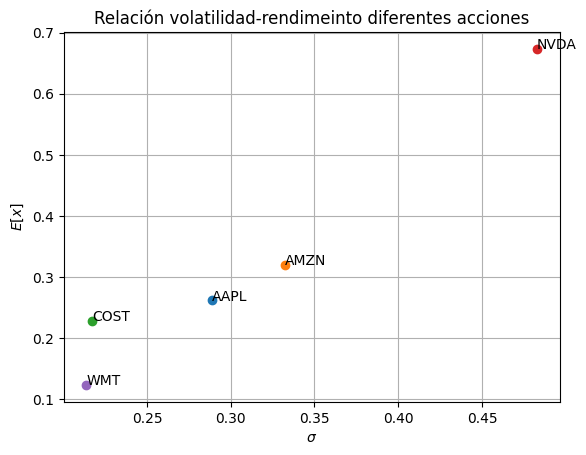

In [10]:
tabla2 = pd.DataFrame({
    "Rendimiento": rt.mean() * 252,
    "Volatilidad": rt.std() * 252**(1/2)
})

plt.figure()

for i in range(len(tabla2)):
    flag_tabla2 = tabla2.iloc[i]
    name = tabla2.index[i]
    plt.scatter(flag_tabla2["Volatilidad"], flag_tabla2["Rendimiento"])
    plt.text(flag_tabla2["Volatilidad"], flag_tabla2["Rendimiento"], name)

plt.grid()
plt.title("Relación volatilidad-rendimeinto diferentes acciones")
plt.xlabel("$\sigma$")
plt.ylabel("$E[x]$")

20% Crea 10000 portafolios con los 3 ETF's y grafique los resultados.

Explica la gráfica, porque es importante o interesante esta visualización

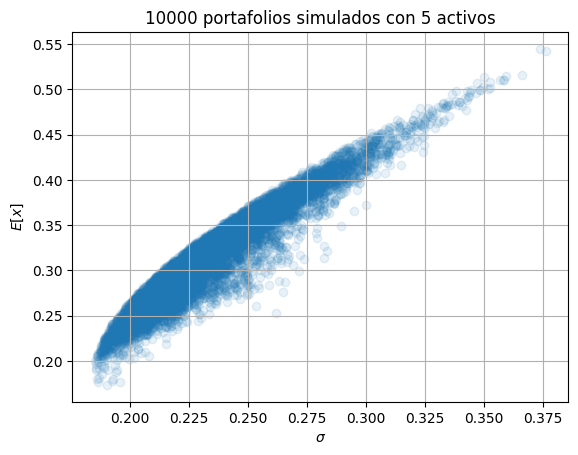

In [11]:
def random_portafolio(returns):
    def rand_weights(n):
        k = np.random.rand(n)
        return k / sum(k)

    means = rt.mean()
    sigma = returns.cov()

    n_act = len(rt.keys())
    w = rand_weights(n_act)

    re = w.dot(means)

    var = w.dot(sigma).dot(w)
    vol = var **(1/2)

    return re * 252, vol * 252**(1/2), w

valores_esperados = []
volatilidades = []
pesos = []
for i in range(10000):
    ve_i, vol_i, pesos_i = random_portafolio(rt)
    valores_esperados.append(ve_i)
    volatilidades.append(vol_i)
    pesos.append(pesos_i)

portafolios_simulados = pd.DataFrame({
    "w": pesos,
    "rendimiento_esperado": valores_esperados,
    "volatilidad": volatilidades
})

plt.scatter(portafolios_simulados["volatilidad"], portafolios_simulados["rendimiento_esperado"], alpha=0.1)
plt.xlabel("$\sigma$")
plt.ylabel("$E[x]$")
plt.title("10000 portafolios simulados con 5 activos")
plt.grid()

La gráfica muestra los 10,000 portafolios simulados ubicados por su volatilidad y rendimiento dependiendo del peso de sus activos en el portafolio. Es interesante la visualización de esta gráfica, ya que nos prueba que es cierto el hecho de que a mayor volatilidad le corresponde mayor rendimiento. También es importante, ya que nos ayuda a ver la forntera de posibilidades de rendimineto esperado sujeto a la volatilidad del portafolio.

10% ¿Cuál es el portafolio de mínima varianza?

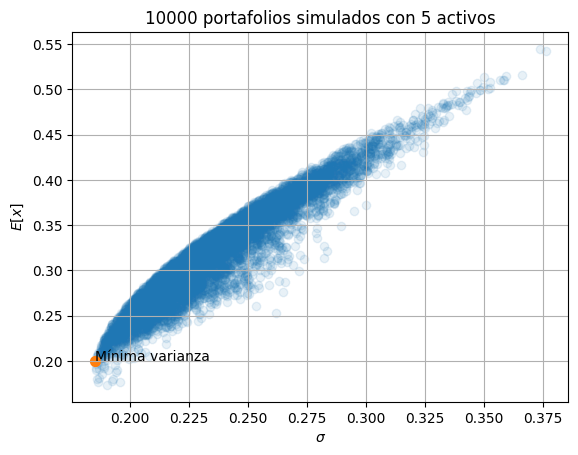

In [12]:
min_var = portafolios_simulados[portafolios_simulados.volatilidad == portafolios_simulados.volatilidad.min()]
pesos_min_var = min_var["w"].values

plt.scatter(portafolios_simulados["volatilidad"], portafolios_simulados["rendimiento_esperado"], alpha=0.1)
plt.scatter(min_var["volatilidad"], min_var["rendimiento_esperado"], s=50)
plt.text(min_var["volatilidad"], min_var["rendimiento_esperado"], "Mínima varianza")
plt.xlabel("$\sigma$")
plt.ylabel("$E[x]$")
plt.title("10000 portafolios simulados con 5 activos")
plt.grid()

In [13]:
print("En el portafolio de mínima varianza el peso de Amazon es de " + str(np.round(pesos_min_var[0][0] * 100, 4)) +
      "%. El de Apple es de \n" + str(np.round(pesos_min_var[0][1] * 100, 4)) + "%. El de Walmart es de " + str(np.round(pesos_min_var[0][2] * 100, 4)) +
      "%. El de Costco es de " + str(np.round(pesos_min_var[0][3] * 100, 4)) + "%. Y el de Nvidia es de " + str(np.round(pesos_min_var[0][4] * 100, 4)) +
      "%. \nEl rendimiento del portafolio es de " + str(np.round(min_var.rendimiento_esperado.values[0] * 100, 4)) +
      "% y la volatilidad del portafolio es de " + str(np.round(min_var.volatilidad.values[0] * 100, 4)) + "%.")

En el portafolio de mínima varianza el peso de Amazon es de 12.2202%. El de Apple es de 
11.0379%. El de Walmart es de 32.4783%. El de Costco es de 0.6607%. Y el de Nvidia es de 43.6029%. 
El rendimiento del portafolio es de 19.9772% y la volatilidad del portafolio es de 18.5262%.


10% --> Crea una regresión lineal de volatilidad y rendimiento de estas acciones

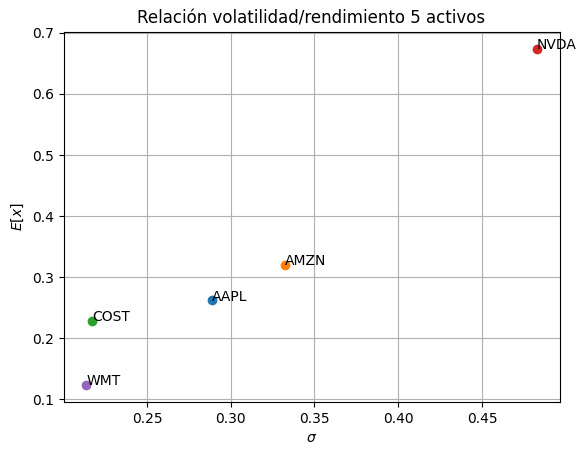

In [14]:
plt.figure()

for i in range(len(tabla2)):
    flag_tabla2 = tabla2.iloc[i]
    name = tabla2.index[i]
    plt.scatter(flag_tabla2["Volatilidad"], flag_tabla2["Rendimiento"])
    plt.text(flag_tabla2["Volatilidad"], flag_tabla2["Rendimiento"], name)

plt.xlabel("$\sigma$")
plt.ylabel("$E[x]$")
plt.title("Relación volatilidad/rendimiento 5 activos")
plt.grid()

In [15]:
model = LinearRegression()
X = tabla2[["Volatilidad"]]
y = tabla2[["Rendimiento"]]

model.fit(X,y)

print("Rendimiento = " + str(np.round(model.intercept_[0], 4)) + " + " + str(np.round(model.coef_[0][0], 4)) + " * vol")

Rendimiento = -0.2452 + 1.8455 * vol


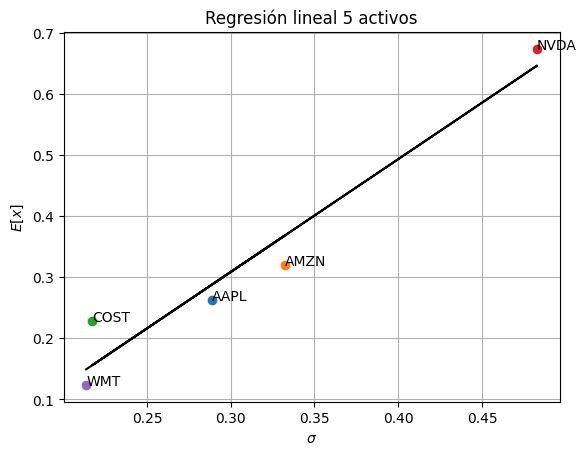

In [16]:
tabla2["predicciones"] = model.predict(X)

plt.figure()

plt.plot(tabla2.Volatilidad, tabla2.predicciones, c="black")

for i in range(len(tabla2)):
    flag_tabla2 = tabla2.iloc[i]
    name = tabla2.index[i]
    plt.scatter(flag_tabla2["Volatilidad"], flag_tabla2["Rendimiento"])
    plt.text(flag_tabla2["Volatilidad"], flag_tabla2["Rendimiento"], name)

plt.xlabel("$\sigma$")
plt.ylabel("$E[x]$")
plt.title("Regresión lineal 5 activos")
plt.grid()